In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

In [2]:
nbhd_overview = pd.read_csv('../regression_data/cleaned_files/nbhd_overview_stats_2015_2019.csv')

nbhd_overview.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 34 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   NBHDNo                                                          158 non-null    int64  
 1   NBHDName                                                        158 non-null    object 
 2   TSNS 2020 Designation                                           158 non-null    object 
 3   Median total income of private household in 2020 ($)            158 non-null    int64  
 4   Median total income of economic family in 2020 ($)              158 non-null    int64  
 5   Participation rate                                              158 non-null    float64
 6   Employment rate                                                 158 non-null    float64
 7   Unemployment rate                                    

In [3]:
nbhd_crime_2015_2019 = pd.read_csv('../regression_data/cleaned_files/nbhd_crime_stats_2015_2019.csv')

nbhd_crime_2015_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   NBHDName               158 non-null    object 
 1   NBHDNo                 158 non-null    int64  
 2   POPULATION_2023        158 non-null    int64  
 3   ASSAULT_RATE_2015      158 non-null    float64
 4   ASSAULT_RATE_2016      158 non-null    float64
 5   ASSAULT_RATE_2017      158 non-null    float64
 6   ASSAULT_RATE_2018      158 non-null    float64
 7   ASSAULT_RATE_2019      158 non-null    float64
 8   AUTOTHEFT_RATE_2015    158 non-null    float64
 9   AUTOTHEFT_RATE_2016    158 non-null    float64
 10  AUTOTHEFT_RATE_2017    158 non-null    float64
 11  AUTOTHEFT_RATE_2018    158 non-null    float64
 12  AUTOTHEFT_RATE_2019    158 non-null    float64
 13  BIKETHEFT_RATE_2015    158 non-null    float64
 14  BIKETHEFT_RATE_2016    158 non-null    float64
 15  BIKETH

In [4]:
libr_2019 = nbhd_overview[['NBHDNo', 'NBHDName','TSNS 2020 Designation','Median total income of private household in 2020 ($)', 'Median total income of economic family in 2020 ($)', 'Participation rate', 'Employment rate',
                                   'Unemployment rate', 'No certificate, diploma or degree (%)', 'High (secondary) school diploma or equivalency certificate (%)', 'Postsecondary certificate, diploma or degree (%)', 'No_of_Branches',
                                'No_of_Workstations', 'No_of_Programs', 'visits_2019', 'reg_2019', 'circ_2019', 'wrkstn_use_2019']].copy()

crime_2019 = nbhd_crime_2015_2019[['NBHDNo', 'ASSAULT_RATE_2019', 'AUTOTHEFT_RATE_2019', 'BIKETHEFT_RATE_2019', 'BREAKENTER_RATE_2019', 'HOMICIDE_RATE_2019', 'ROBBERY_RATE_2019', 'SHOOTING_RATE_2019', 'THEFTFROMMV_RATE_2019', 'THEFTOVER_RATE_2019']].copy()

nbhd_libr_crime_2019 = pd.merge(libr_2019, crime_2019, on='NBHDNo')

nbhd_libr_crime_2019 = nbhd_libr_crime_2019.drop(['NBHDName','TSNS 2020 Designation'], axis=1)

nbhd_libr_crime_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 25 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   NBHDNo                                                          158 non-null    int64  
 1   Median total income of private household in 2020 ($)            158 non-null    int64  
 2   Median total income of economic family in 2020 ($)              158 non-null    int64  
 3   Participation rate                                              158 non-null    float64
 4   Employment rate                                                 158 non-null    float64
 5   Unemployment rate                                               158 non-null    float64
 6   No certificate, diploma or degree (%)                           158 non-null    float64
 7   High (secondary) school diploma or equivalency certif

### Building model with backward selection

In [5]:
model_2019 = nbhd_libr_crime_2019.copy()

In [6]:
y = model_2019['visits_2019']
X = model_2019.drop(['visits_2019'], axis=1)
X = sm.add_constant(X)

model_visits_2019 = sm.OLS(y.astype(float), X.astype(float))
results_2019 = model_visits_2019.fit()
print(results_2019.summary())

                            OLS Regression Results                            
Dep. Variable:            visits_2019   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     149.3
Date:                Sun, 28 Jan 2024   Prob (F-statistic):           3.30e-84
Time:                        02:02:40   Log-Likelihood:                -1888.5
No. Observations:                 158   AIC:                             3827.
Df Residuals:                     133   BIC:                             3904.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [7]:
y = model_2019['visits_2019']
X = model_2019.drop(['visits_2019', 'THEFTOVER_RATE_2019'], axis=1)
X = sm.add_constant(X)

model_visits_2019 = sm.OLS(y.astype(float), X.astype(float))
results_2019 = model_visits_2019.fit()
print(results_2019.summary())

                            OLS Regression Results                            
Dep. Variable:            visits_2019   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     156.8
Date:                Sun, 28 Jan 2024   Prob (F-statistic):           2.69e-85
Time:                        02:06:56   Log-Likelihood:                -1888.5
No. Observations:                 158   AIC:                             3825.
Df Residuals:                     134   BIC:                             3899.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [8]:
y = model_2019['visits_2019']
X = model_2019.drop(['visits_2019', 'THEFTOVER_RATE_2019', 'Participation rate'], axis=1)
X = sm.add_constant(X)

model_visits_2019 = sm.OLS(y.astype(float), X.astype(float))
results_2019 = model_visits_2019.fit()
print(results_2019.summary())

                            OLS Regression Results                            
Dep. Variable:            visits_2019   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     164.9
Date:                Sun, 28 Jan 2024   Prob (F-statistic):           2.36e-86
Time:                        02:08:06   Log-Likelihood:                -1888.7
No. Observations:                 158   AIC:                             3823.
Df Residuals:                     135   BIC:                             3894.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [9]:
y = model_2019['visits_2019']
X = model_2019.drop(['visits_2019', 'THEFTOVER_RATE_2019', 'Participation rate', 'Unemployment rate'], axis=1)
X = sm.add_constant(X)

model_visits_2019 = sm.OLS(y.astype(float), X.astype(float))
results_2019 = model_visits_2019.fit()
print(results_2019.summary())

                            OLS Regression Results                            
Dep. Variable:            visits_2019   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     173.9
Date:                Sun, 28 Jan 2024   Prob (F-statistic):           1.79e-87
Time:                        02:08:59   Log-Likelihood:                -1888.7
No. Observations:                 158   AIC:                             3821.
Df Residuals:                     136   BIC:                             3889.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [10]:
y = model_2019['visits_2019']
X = model_2019.drop(['visits_2019', 'THEFTOVER_RATE_2019', 'Participation rate', 'Unemployment rate', 'HOMICIDE_RATE_2019'], axis=1)
X = sm.add_constant(X)

model_visits_2019 = sm.OLS(y.astype(float), X.astype(float))
results_2019 = model_visits_2019.fit()
print(results_2019.summary())

                            OLS Regression Results                            
Dep. Variable:            visits_2019   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     183.6
Date:                Sun, 28 Jan 2024   Prob (F-statistic):           1.47e-88
Time:                        02:09:54   Log-Likelihood:                -1888.9
No. Observations:                 158   AIC:                             3820.
Df Residuals:                     137   BIC:                             3884.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [11]:
y = model_2019['visits_2019']
X = model_2019.drop(['visits_2019', 'THEFTOVER_RATE_2019', 'Participation rate', 'Unemployment rate', 'HOMICIDE_RATE_2019', 'Median total income of private household in 2020 ($)'], axis=1)
X = sm.add_constant(X)

model_visits_2019 = sm.OLS(y.astype(float), X.astype(float))
results_2019 = model_visits_2019.fit()
print(results_2019.summary())

                            OLS Regression Results                            
Dep. Variable:            visits_2019   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     193.5
Date:                Sun, 28 Jan 2024   Prob (F-statistic):           1.58e-89
Time:                        02:10:31   Log-Likelihood:                -1889.3
No. Observations:                 158   AIC:                             3819.
Df Residuals:                     138   BIC:                             3880.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [12]:
y = model_2019['visits_2019']
X = model_2019.drop(['visits_2019', 'THEFTOVER_RATE_2019', 'Participation rate', 'Unemployment rate', 'HOMICIDE_RATE_2019', 'Median total income of private household in 2020 ($)', 
                     'Median total income of economic family in 2020 ($)'], axis=1)
X = sm.add_constant(X)

model_visits_2019 = sm.OLS(y.astype(float), X.astype(float))
results_2019 = model_visits_2019.fit()
print(results_2019.summary())

                            OLS Regression Results                            
Dep. Variable:            visits_2019   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     204.8
Date:                Sun, 28 Jan 2024   Prob (F-statistic):           1.45e-90
Time:                        02:11:13   Log-Likelihood:                -1889.7
No. Observations:                 158   AIC:                             3817.
Df Residuals:                     139   BIC:                             3876.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [13]:
y = model_2019['visits_2019']
X = model_2019.drop(['visits_2019', 'THEFTOVER_RATE_2019', 'Participation rate', 'Unemployment rate', 'HOMICIDE_RATE_2019', 'Median total income of private household in 2020 ($)', 
                     'Median total income of economic family in 2020 ($)', 'Employment rate'], axis=1)
X = sm.add_constant(X)

model_visits_2019 = sm.OLS(y.astype(float), X.astype(float))
results_2019 = model_visits_2019.fit()
print(results_2019.summary())

                            OLS Regression Results                            
Dep. Variable:            visits_2019   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     218.0
Date:                Sun, 28 Jan 2024   Prob (F-statistic):           1.11e-91
Time:                        02:11:40   Log-Likelihood:                -1889.8
No. Observations:                 158   AIC:                             3816.
Df Residuals:                     140   BIC:                             3871.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [14]:
y = model_2019['visits_2019']
X = model_2019.drop(['visits_2019', 'THEFTOVER_RATE_2019', 'Participation rate', 'Unemployment rate', 'HOMICIDE_RATE_2019', 'Median total income of private household in 2020 ($)', 
                     'Median total income of economic family in 2020 ($)', 'Employment rate', 'No certificate, diploma or degree (%)'], axis=1)
X = sm.add_constant(X)

model_visits_2019 = sm.OLS(y.astype(float), X.astype(float))
results_2019 = model_visits_2019.fit()
print(results_2019.summary())

                            OLS Regression Results                            
Dep. Variable:            visits_2019   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     232.2
Date:                Sun, 28 Jan 2024   Prob (F-statistic):           9.82e-93
Time:                        02:12:22   Log-Likelihood:                -1890.2
No. Observations:                 158   AIC:                             3814.
Df Residuals:                     141   BIC:                             3866.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [15]:
y = model_2019['visits_2019']
X = model_2019.drop(['visits_2019', 'THEFTOVER_RATE_2019', 'Participation rate', 'Unemployment rate', 'HOMICIDE_RATE_2019', 'Median total income of private household in 2020 ($)', 
                     'Median total income of economic family in 2020 ($)', 'Employment rate', 'No certificate, diploma or degree (%)', 'High (secondary) school diploma or equivalency certificate (%)'], axis=1)
X = sm.add_constant(X)

model_visits_2019 = sm.OLS(y.astype(float), X.astype(float))
results_2019 = model_visits_2019.fit()
print(results_2019.summary())

                            OLS Regression Results                            
Dep. Variable:            visits_2019   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     248.0
Date:                Sun, 28 Jan 2024   Prob (F-statistic):           9.00e-94
Time:                        02:12:49   Log-Likelihood:                -1890.6
No. Observations:                 158   AIC:                             3813.
Df Residuals:                     142   BIC:                             3862.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [16]:
y = model_2019['visits_2019']
X = model_2019.drop(['visits_2019', 'THEFTOVER_RATE_2019', 'Participation rate', 'Unemployment rate', 'HOMICIDE_RATE_2019', 'Median total income of private household in 2020 ($)', 
                     'Median total income of economic family in 2020 ($)', 'Employment rate', 'No certificate, diploma or degree (%)', 'High (secondary) school diploma or equivalency certificate (%)',
                    'Postsecondary certificate, diploma or degree (%)'], axis=1)
X = sm.add_constant(X)

model_visits_2019 = sm.OLS(y.astype(float), X.astype(float))
results_2019 = model_visits_2019.fit()
print(results_2019.summary())

                            OLS Regression Results                            
Dep. Variable:            visits_2019   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     258.3
Date:                Sun, 28 Jan 2024   Prob (F-statistic):           6.06e-94
Time:                        02:13:24   Log-Likelihood:                -1893.3
No. Observations:                 158   AIC:                             3817.
Df Residuals:                     143   BIC:                             3863.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -7659.73

In [17]:
y = model_2019['visits_2019']
X = model_2019.drop(['visits_2019', 'THEFTOVER_RATE_2019', 'Participation rate', 'Unemployment rate', 'HOMICIDE_RATE_2019', 'Median total income of private household in 2020 ($)', 
                     'Median total income of economic family in 2020 ($)', 'Employment rate', 'No certificate, diploma or degree (%)', 'High (secondary) school diploma or equivalency certificate (%)',
                    'Postsecondary certificate, diploma or degree (%)', 'No_of_Branches'], axis=1)
X = sm.add_constant(X)

model_visits_2019 = sm.OLS(y.astype(float), X.astype(float))
results_2019 = model_visits_2019.fit()
print(results_2019.summary())

                            OLS Regression Results                            
Dep. Variable:            visits_2019   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     276.3
Date:                Sun, 28 Jan 2024   Prob (F-statistic):           9.11e-95
Time:                        02:13:52   Log-Likelihood:                -1894.3
No. Observations:                 158   AIC:                             3817.
Df Residuals:                     144   BIC:                             3860.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -8580.43

In [18]:
y = model_2019['visits_2019']
X = model_2019.drop(['visits_2019', 'THEFTOVER_RATE_2019', 'Participation rate', 'Unemployment rate', 'HOMICIDE_RATE_2019', 'Median total income of private household in 2020 ($)', 
                     'Median total income of economic family in 2020 ($)', 'Employment rate', 'No certificate, diploma or degree (%)', 'High (secondary) school diploma or equivalency certificate (%)',
                    'Postsecondary certificate, diploma or degree (%)', 'No_of_Branches', 'THEFTFROMMV_RATE_2019'], axis=1)
X = sm.add_constant(X)

model_visits_2019 = sm.OLS(y.astype(float), X.astype(float))
results_2019 = model_visits_2019.fit()
print(results_2019.summary())

                            OLS Regression Results                            
Dep. Variable:            visits_2019   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     300.5
Date:                Sun, 28 Jan 2024   Prob (F-statistic):           6.31e-96
Time:                        02:14:18   Log-Likelihood:                -1894.6
No. Observations:                 158   AIC:                             3815.
Df Residuals:                     145   BIC:                             3855.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -9527.1231 

In [19]:
y = model_2019['visits_2019']
X = model_2019.drop(['visits_2019', 'THEFTOVER_RATE_2019', 'Participation rate', 'Unemployment rate', 'HOMICIDE_RATE_2019', 'Median total income of private household in 2020 ($)', 
                     'Median total income of economic family in 2020 ($)', 'Employment rate', 'No certificate, diploma or degree (%)', 'High (secondary) school diploma or equivalency certificate (%)',
                    'Postsecondary certificate, diploma or degree (%)', 'No_of_Branches', 'THEFTFROMMV_RATE_2019', 'BIKETHEFT_RATE_2019'], axis=1)
X = sm.add_constant(X)

model_visits_2019 = sm.OLS(y.astype(float), X.astype(float))
results_2019 = model_visits_2019.fit()
print(results_2019.summary())

                            OLS Regression Results                            
Dep. Variable:            visits_2019   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     328.7
Date:                Sun, 28 Jan 2024   Prob (F-statistic):           4.56e-97
Time:                        02:14:56   Log-Likelihood:                -1894.9
No. Observations:                 158   AIC:                             3814.
Df Residuals:                     146   BIC:                             3851.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -7631.5703 

In [20]:
y = model_2019['visits_2019']
X = model_2019.drop(['visits_2019', 'THEFTOVER_RATE_2019', 'Participation rate', 'Unemployment rate', 'HOMICIDE_RATE_2019', 'Median total income of private household in 2020 ($)', 
                     'Median total income of economic family in 2020 ($)', 'Employment rate', 'No certificate, diploma or degree (%)', 'High (secondary) school diploma or equivalency certificate (%)',
                    'Postsecondary certificate, diploma or degree (%)', 'No_of_Branches', 'THEFTFROMMV_RATE_2019', 'BIKETHEFT_RATE_2019', 'ASSAULT_RATE_2019'], axis=1)
X = sm.add_constant(X)

model_visits_2019 = sm.OLS(y.astype(float), X.astype(float))
results_2019 = model_visits_2019.fit()
print(results_2019.summary())

                            OLS Regression Results                            
Dep. Variable:            visits_2019   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     363.4
Date:                Sun, 28 Jan 2024   Prob (F-statistic):           2.60e-98
Time:                        02:15:22   Log-Likelihood:                -1895.0
No. Observations:                 158   AIC:                             3812.
Df Residuals:                     147   BIC:                             3846.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -8633.5265 

In [21]:
y = model_2019['visits_2019']
X = model_2019.drop(['visits_2019', 'THEFTOVER_RATE_2019', 'Participation rate', 'Unemployment rate', 'HOMICIDE_RATE_2019', 'Median total income of private household in 2020 ($)', 
                     'Median total income of economic family in 2020 ($)', 'Employment rate', 'No certificate, diploma or degree (%)', 'High (secondary) school diploma or equivalency certificate (%)',
                    'Postsecondary certificate, diploma or degree (%)', 'No_of_Branches', 'THEFTFROMMV_RATE_2019', 'BIKETHEFT_RATE_2019', 'ASSAULT_RATE_2019', 'reg_2019'], axis=1)
X = sm.add_constant(X)

model_visits_2019 = sm.OLS(y.astype(float), X.astype(float))
results_2019 = model_visits_2019.fit()
print(results_2019.summary())

                            OLS Regression Results                            
Dep. Variable:            visits_2019   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     404.5
Date:                Sun, 28 Jan 2024   Prob (F-statistic):           1.80e-99
Time:                        02:15:51   Log-Likelihood:                -1895.4
No. Observations:                 158   AIC:                             3811.
Df Residuals:                     148   BIC:                             3841.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -8319.9853 

In [22]:
y = model_2019['visits_2019']
X = model_2019.drop(['visits_2019', 'THEFTOVER_RATE_2019', 'Participation rate', 'Unemployment rate', 'HOMICIDE_RATE_2019', 'Median total income of private household in 2020 ($)', 
                     'Median total income of economic family in 2020 ($)', 'Employment rate', 'No certificate, diploma or degree (%)', 'High (secondary) school diploma or equivalency certificate (%)',
                    'Postsecondary certificate, diploma or degree (%)', 'No_of_Branches', 'THEFTFROMMV_RATE_2019', 'BIKETHEFT_RATE_2019', 'ASSAULT_RATE_2019', 'reg_2019', 'NBHDNo'], axis=1)
X = sm.add_constant(X)

model_visits_2019 = sm.OLS(y.astype(float), X.astype(float))
results_2019 = model_visits_2019.fit()
print(results_2019.summary())

                            OLS Regression Results                            
Dep. Variable:            visits_2019   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     455.3
Date:                Sun, 28 Jan 2024   Prob (F-statistic):          1.27e-100
Time:                        02:16:20   Log-Likelihood:                -1895.9
No. Observations:                 158   AIC:                             3810.
Df Residuals:                     149   BIC:                             3837.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1454.0659 

In [23]:
y = model_2019['visits_2019']
X = model_2019.drop(['visits_2019', 'THEFTOVER_RATE_2019', 'Participation rate', 'Unemployment rate', 'HOMICIDE_RATE_2019', 'Median total income of private household in 2020 ($)', 
                     'Median total income of economic family in 2020 ($)', 'Employment rate', 'No certificate, diploma or degree (%)', 'High (secondary) school diploma or equivalency certificate (%)',
                    'Postsecondary certificate, diploma or degree (%)', 'No_of_Branches', 'THEFTFROMMV_RATE_2019', 'BIKETHEFT_RATE_2019', 'ASSAULT_RATE_2019', 'reg_2019', 'NBHDNo', 'ROBBERY_RATE_2019'], axis=1)
X = sm.add_constant(X)

model_visits_2019 = sm.OLS(y.astype(float), X.astype(float))
results_2019 = model_visits_2019.fit()
print(results_2019.summary())

                            OLS Regression Results                            
Dep. Variable:            visits_2019   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     520.9
Date:                Sun, 28 Jan 2024   Prob (F-statistic):          8.03e-102
Time:                        02:16:44   Log-Likelihood:                -1896.3
No. Observations:                 158   AIC:                             3809.
Df Residuals:                     150   BIC:                             3833.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -2171.2312 

In [24]:
y = model_2019['visits_2019']
X = model_2019.drop(['visits_2019', 'THEFTOVER_RATE_2019', 'Participation rate', 'Unemployment rate', 'HOMICIDE_RATE_2019', 'Median total income of private household in 2020 ($)', 
                     'Median total income of economic family in 2020 ($)', 'Employment rate', 'No certificate, diploma or degree (%)', 'High (secondary) school diploma or equivalency certificate (%)',
                    'Postsecondary certificate, diploma or degree (%)', 'No_of_Branches', 'THEFTFROMMV_RATE_2019', 'BIKETHEFT_RATE_2019', 'ASSAULT_RATE_2019', 'reg_2019', 'NBHDNo', 'ROBBERY_RATE_2019',
                    'AUTOTHEFT_RATE_2019'], axis=1)
X = sm.add_constant(X)

model_visits_2019 = sm.OLS(y.astype(float), X.astype(float))
results_2019 = model_visits_2019.fit()
print(results_2019.summary())

                            OLS Regression Results                            
Dep. Variable:            visits_2019   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     608.6
Date:                Sun, 28 Jan 2024   Prob (F-statistic):          4.48e-103
Time:                        02:17:07   Log-Likelihood:                -1896.7
No. Observations:                 158   AIC:                             3807.
Df Residuals:                     151   BIC:                             3829.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -204.7337 

In [25]:
y = model_2019['visits_2019']
X = model_2019.drop(['visits_2019', 'THEFTOVER_RATE_2019', 'Participation rate', 'Unemployment rate', 'HOMICIDE_RATE_2019', 'Median total income of private household in 2020 ($)', 
                     'Median total income of economic family in 2020 ($)', 'Employment rate', 'No certificate, diploma or degree (%)', 'High (secondary) school diploma or equivalency certificate (%)',
                    'Postsecondary certificate, diploma or degree (%)', 'No_of_Branches', 'THEFTFROMMV_RATE_2019', 'BIKETHEFT_RATE_2019', 'ASSAULT_RATE_2019', 'reg_2019', 'NBHDNo', 'ROBBERY_RATE_2019',
                    'AUTOTHEFT_RATE_2019', 'SHOOTING_RATE_2019'], axis=1)
X = sm.add_constant(X)

model_visits_2019 = sm.OLS(y.astype(float), X.astype(float))
results_2019 = model_visits_2019.fit()
print(results_2019.summary())

                            OLS Regression Results                            
Dep. Variable:            visits_2019   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     726.5
Date:                Sun, 28 Jan 2024   Prob (F-statistic):          3.74e-104
Time:                        02:17:32   Log-Likelihood:                -1897.6
No. Observations:                 158   AIC:                             3807.
Df Residuals:                     152   BIC:                             3826.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -4400.4649 

In [26]:
y = model_2019['visits_2019']
X = model_2019.drop(['visits_2019', 'THEFTOVER_RATE_2019', 'Participation rate', 'Unemployment rate', 'HOMICIDE_RATE_2019', 'Median total income of private household in 2020 ($)', 
                     'Median total income of economic family in 2020 ($)', 'Employment rate', 'No certificate, diploma or degree (%)', 'High (secondary) school diploma or equivalency certificate (%)',
                    'Postsecondary certificate, diploma or degree (%)', 'No_of_Branches', 'THEFTFROMMV_RATE_2019', 'BIKETHEFT_RATE_2019', 'ASSAULT_RATE_2019', 'reg_2019', 'NBHDNo', 'ROBBERY_RATE_2019',
                    'AUTOTHEFT_RATE_2019', 'SHOOTING_RATE_2019', 'BREAKENTER_RATE_2019'], axis=1)
X = sm.add_constant(X)

model_visits_2019 = sm.OLS(y.astype(float), X.astype(float))
results_2019 = model_visits_2019.fit()
print(results_2019.summary())

                            OLS Regression Results                            
Dep. Variable:            visits_2019   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     903.2
Date:                Sun, 28 Jan 2024   Prob (F-statistic):          2.81e-105
Time:                        02:17:55   Log-Likelihood:                -1898.5
No. Observations:                 158   AIC:                             3807.
Df Residuals:                     153   BIC:                             3822.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2143.7367   4162

In [27]:
y = model_2019['visits_2019']
X = model_2019.drop(['visits_2019', 'THEFTOVER_RATE_2019', 'Participation rate', 'Unemployment rate', 'HOMICIDE_RATE_2019', 'Median total income of private household in 2020 ($)', 
                     'Median total income of economic family in 2020 ($)', 'Employment rate', 'No certificate, diploma or degree (%)', 'High (secondary) school diploma or equivalency certificate (%)',
                    'Postsecondary certificate, diploma or degree (%)', 'No_of_Branches', 'THEFTFROMMV_RATE_2019', 'BIKETHEFT_RATE_2019', 'ASSAULT_RATE_2019', 'reg_2019', 'NBHDNo', 'ROBBERY_RATE_2019',
                    'AUTOTHEFT_RATE_2019', 'SHOOTING_RATE_2019', 'BREAKENTER_RATE_2019', 'No_of_Workstations'], axis=1)
X = sm.add_constant(X)

model_visits_2019 = sm.OLS(y.astype(float), X.astype(float))
results_2019 = model_visits_2019.fit()
print(results_2019.summary())

                            OLS Regression Results                            
Dep. Variable:            visits_2019   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     1186.
Date:                Sun, 28 Jan 2024   Prob (F-statistic):          3.65e-106
Time:                        02:18:40   Log-Likelihood:                -1900.1
No. Observations:                 158   AIC:                             3808.
Df Residuals:                     154   BIC:                             3821.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2857.1535   4173.123     

In [28]:
model_visual = nbhd_libr_crime_2019.copy()

model_visual = model_visual.drop(['THEFTOVER_RATE_2019', 'Participation rate', 'Unemployment rate', 'HOMICIDE_RATE_2019', 'Median total income of private household in 2020 ($)', 
                     'Median total income of economic family in 2020 ($)', 'Employment rate', 'No certificate, diploma or degree (%)', 'High (secondary) school diploma or equivalency certificate (%)',
                    'Postsecondary certificate, diploma or degree (%)', 'No_of_Branches', 'THEFTFROMMV_RATE_2019', 'BIKETHEFT_RATE_2019', 'ASSAULT_RATE_2019', 'reg_2019', 'NBHDNo', 'ROBBERY_RATE_2019',
                    'AUTOTHEFT_RATE_2019', 'SHOOTING_RATE_2019', 'BREAKENTER_RATE_2019', 'No_of_Workstations'], axis=1)

model_visual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   No_of_Programs   158 non-null    int64
 1   visits_2019      158 non-null    int64
 2   circ_2019        158 non-null    int64
 3   wrkstn_use_2019  158 non-null    int64
dtypes: int64(4)
memory usage: 5.1 KB


C:\Users\Sonia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


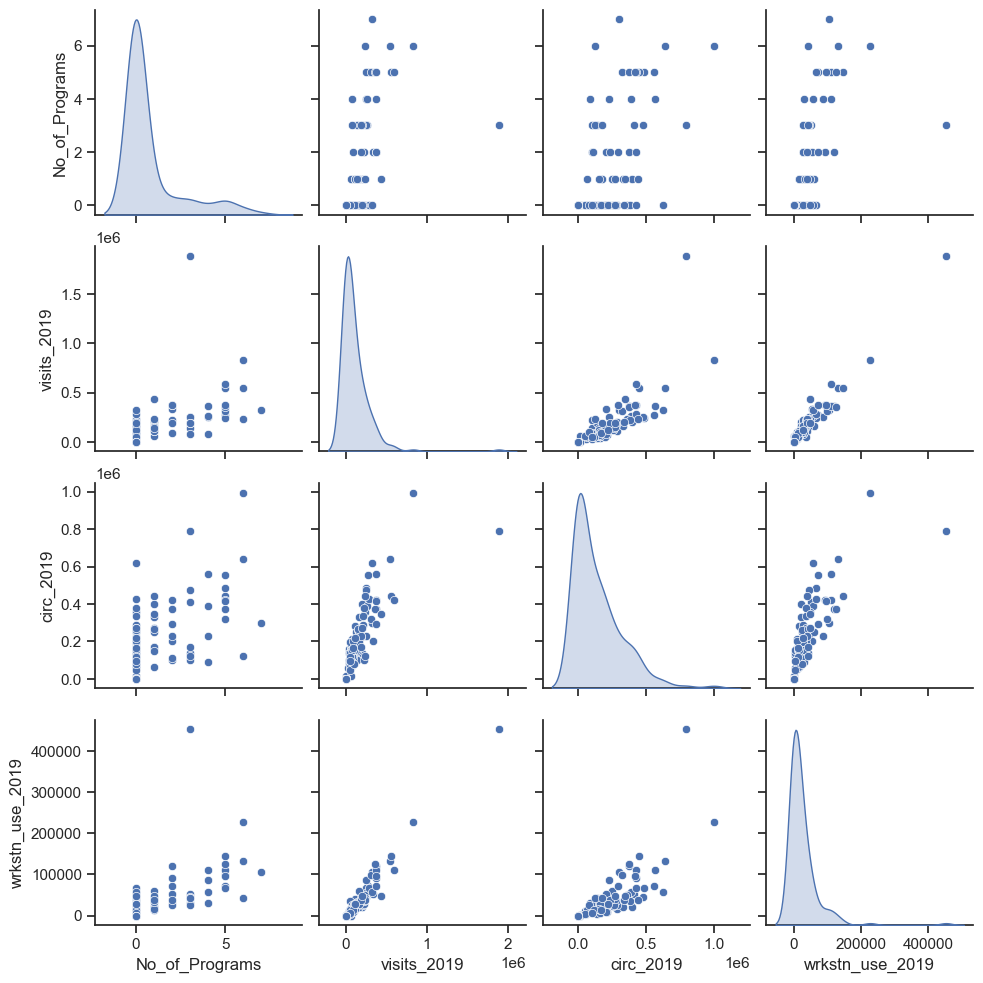

In [29]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(model_visual, diag_kind="kde", vars=['No_of_Programs', 'visits_2019', 'circ_2019', 'wrkstn_use_2019'])
#plt.savefig('../images/pairplotfs.png', dpi=300, bbox_inches='tight')
plt.show()